# UTILS

In [14]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../")

import xopt
print(xopt.__version__)

data_dir = "/home/physics3/ml_tuning/20230813_LCLS2_Injector_new_emit"


2.0a1+63.g53057de


In [15]:
from scripts.evaluate_function.screen_image import measure_beamsize, measure_background
from scripts.optimize_function import optimize_function
from scripts.characterize_emittance import characterize_emittance

In [16]:
## import variable ranges
from utils import VARIABLE_RANGES, SCAN_VARIABLE, \
    MEASUREMENT_OPTIONS, IMAGE_CONSTRAINTS, TUNING_VARIABLES, SCREEN_NAME, eval_beamsize

## (Optional) Measure background image

In [17]:
MEASURE_BACKGROUND = True
BACKGROUND_FILE = f"{data_dir}/{SCREEN_NAME}_background.npy".replace(":","_")

if MEASURE_BACKGROUND:
    measure_background(SCREEN_NAME, filename=BACKGROUND_FILE)


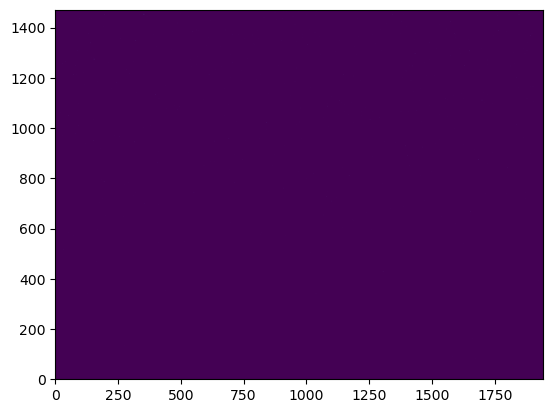

In [18]:
# verify background image
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.load(BACKGROUND_FILE),origin="lower")

## reset point

In [ ]:
# get reset point
from epics import caget_many, caput
result = caget_many(list(VARIABLE_RANGES.keys()))

In [ ]:
# get reset point
from epics import caget_many, caput
reset_dict = {
'SOLN:IN20:121:BCTRL': 0.4762021,
 'QUAD:IN20:121:BCTRL': 0.0078884391,
 'QUAD:IN20:122:BCTRL': -0.0019310605,
 'QUAD:IN20:361:BCTRL': -2.6188653,
 'QUAD:IN20:371:BCTRL': 2.1427768,
 'QUAD:IN20:425:BCTRL': 0.01,
 'QUAD:IN20:441:BCTRL': 0.5044999999999993,
 'QUAD:IN20:511:BCTRL': 2.7346698,
 'QUAD:IN20:525:BCTRL': -3.1
}

#for name, val in reset_dict.items():
#    caput(name, val)

## test measurement

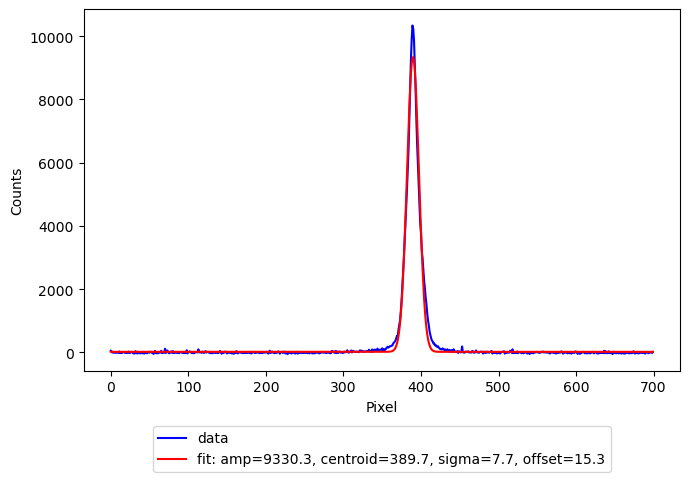

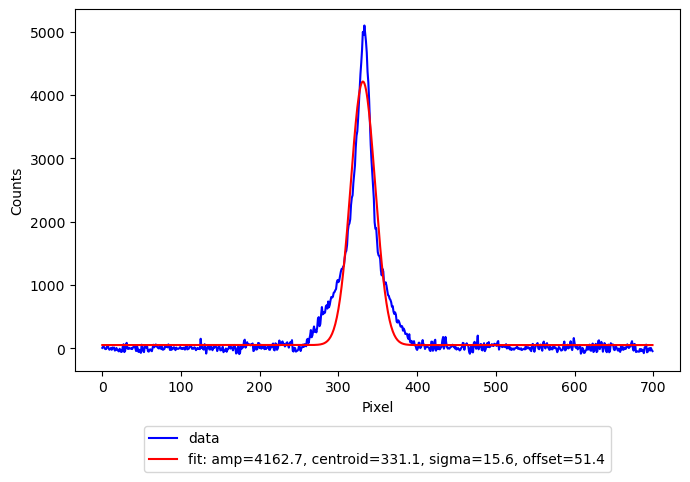

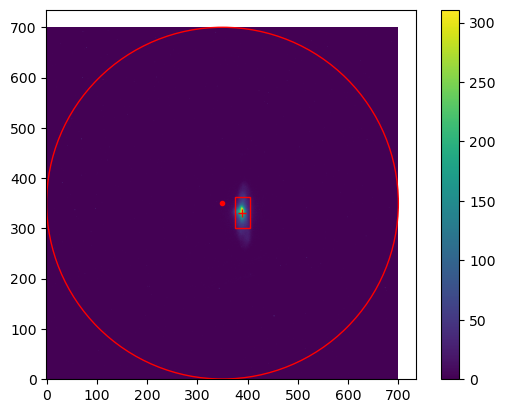

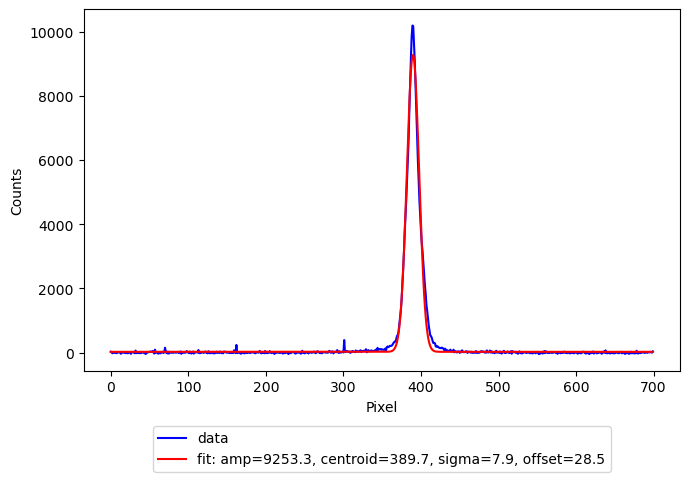

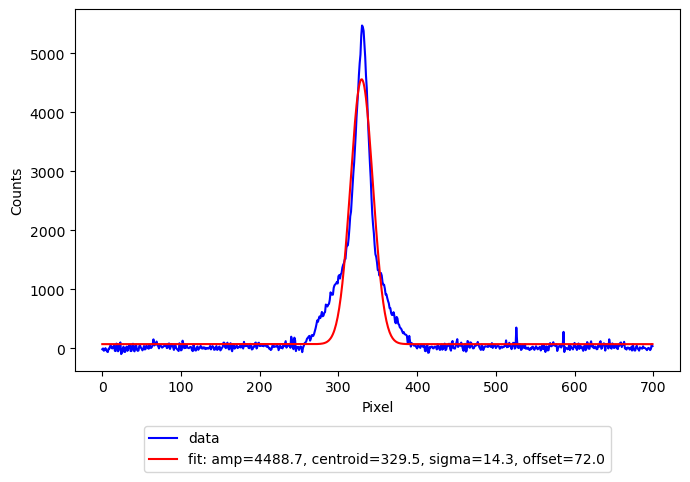

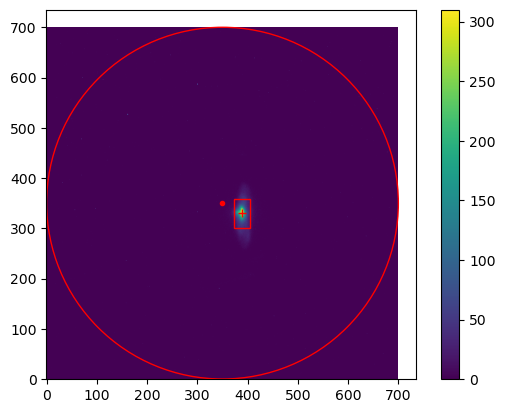

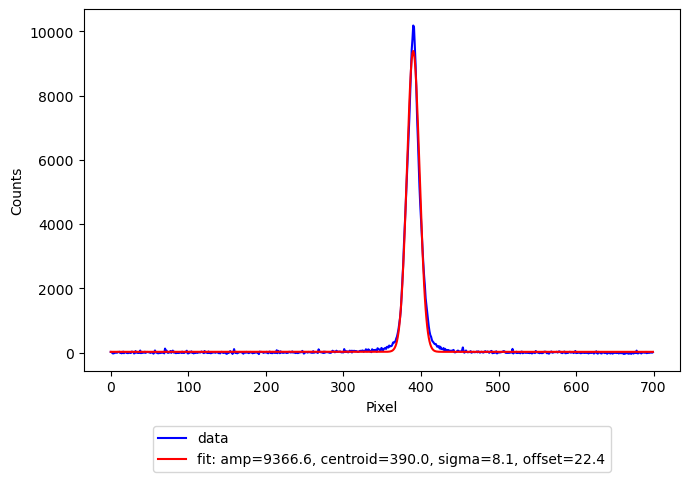

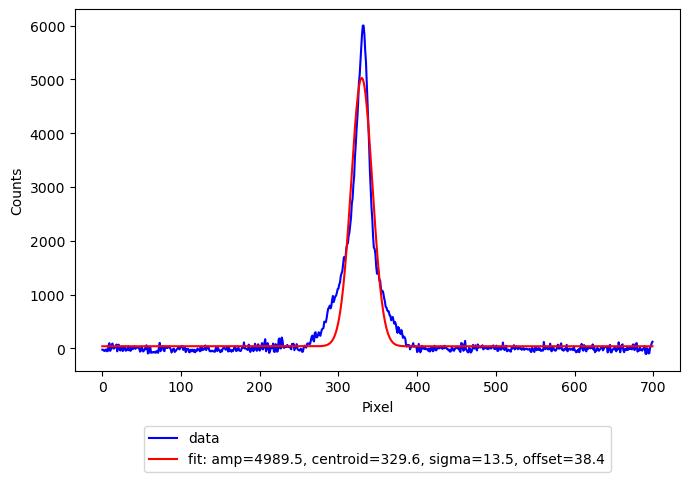

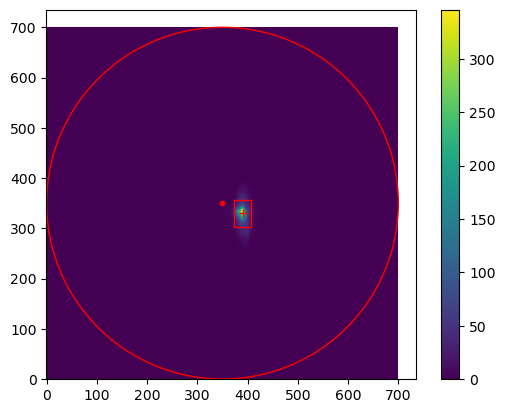

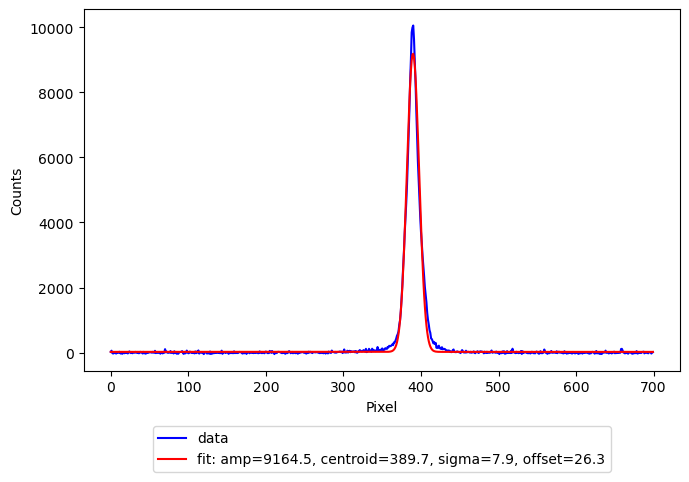

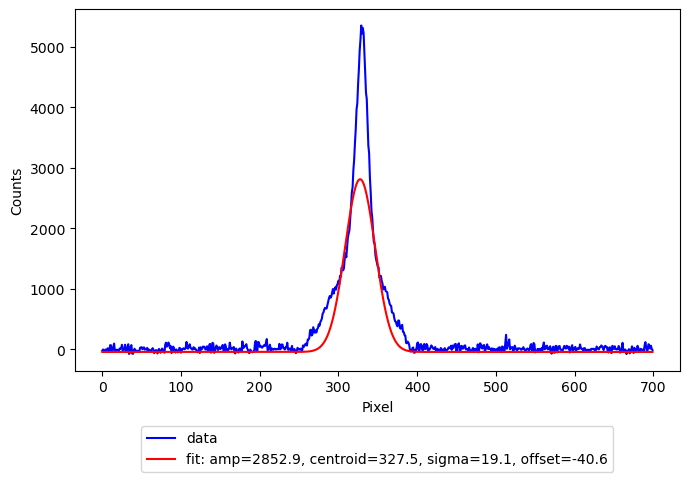

,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,log10_total_intensity,time
0,389.683005,331.118501,151.291094,305.361908,-275.503073,322566.85,5.508620,1.691978e+09
1,389.693542,329.496387,154.770713,279.163768,-275.934434,325042.60,5.511940,1.691979e+09
2,389.966794,329.601170,158.714617,264.337505,-276.481242,332185.50,5.521381,1.691979e+09
3,389.697940,327.547155,154.144515,373.016885,-267.877839,325419.15,5.512443,1.691979e+09


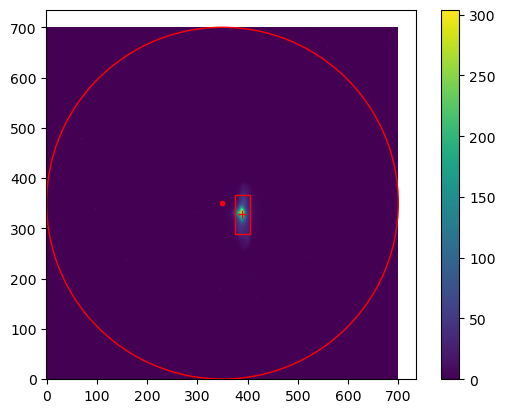

In [26]:
import pandas as pd
res = measure_beamsize({
    "screen":SCREEN_NAME, 
    "roi":[600,625,700,700],
    "visualize": True, 
    "background":BACKGROUND_FILE,
    "n_shots":4,
    "min_log_intensity":4.0
})
pd.DataFrame(res)

In [29]:
from scripts.utils.read_files import read_file
res = read_file(
    "/home/physics3/ml_tuning/20230813_LCLS2_Injector_new_emit/characterize_1/1691985207.1960971.h5"
)

In [30]:
res

{'images': array([[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 2.5],
         ...,
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]],
 
        [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         ...,
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]],
 
        [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         ...,
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]],
 
        [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 1. , 0. , ..., 0. , 3. , 0. ],
         [0. , 0. ,

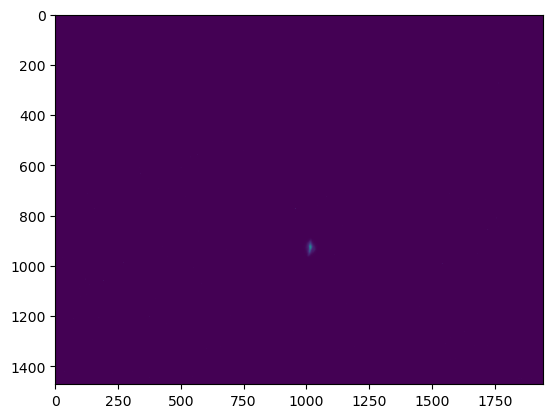

In [32]:
plt.imshow(res["images"][0])